In [1]:
library(tidyverse)
library(ggpubr)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4      ✔ purrr   0.3.5 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




# Fig. 1

## Fig. 1e

In [2]:
s_ls = c()
gen_ls = c()
lineage_ls = c()
sim_ls = c()

for (s in c(0.1, 0.9)) {
    for (gen in c(20, 50, 100, 150, 200, 250, 300, 350, 400)){
        print(paste0(s,"_", gen))
        for (sim in  list.files("/syn1/wangxin/work/GB_rev/simul/1209/res/linear_bn/")){
            s_ls = append(s_ls, s)
            gen_ls = append(gen_ls, gen)
            sim_ls = append(sim_ls, sim)
            if (gen == 20) {
                lineage_ls = append(lineage_ls, 5000)
            }
            else {
                input_table = paste0("/syn1/wangxin/work/GB_rev/simul/1209/mt_freq/linear_bn/mt_mut_freq_mid_100_500_5e-08_", sim, "_", s, "_", gen,"_cells.csv")
                csv = read.csv(input_table, head = T)
                existing_lineage = nrow(as.data.frame(table(sapply(csv$cells, function(x) {strsplit(x,">_")[[1]][1]}))))
                lineage_ls = append(lineage_ls, existing_lineage)
                }
        }
    }
}

[1] "0.1_20"
[1] "0.1_50"
[1] "0.1_100"
[1] "0.1_150"
[1] "0.1_200"
[1] "0.1_250"
[1] "0.1_300"
[1] "0.1_350"
[1] "0.1_400"
[1] "0.9_20"
[1] "0.9_50"
[1] "0.9_100"
[1] "0.9_150"
[1] "0.9_200"
[1] "0.9_250"
[1] "0.9_300"
[1] "0.9_350"
[1] "0.9_400"


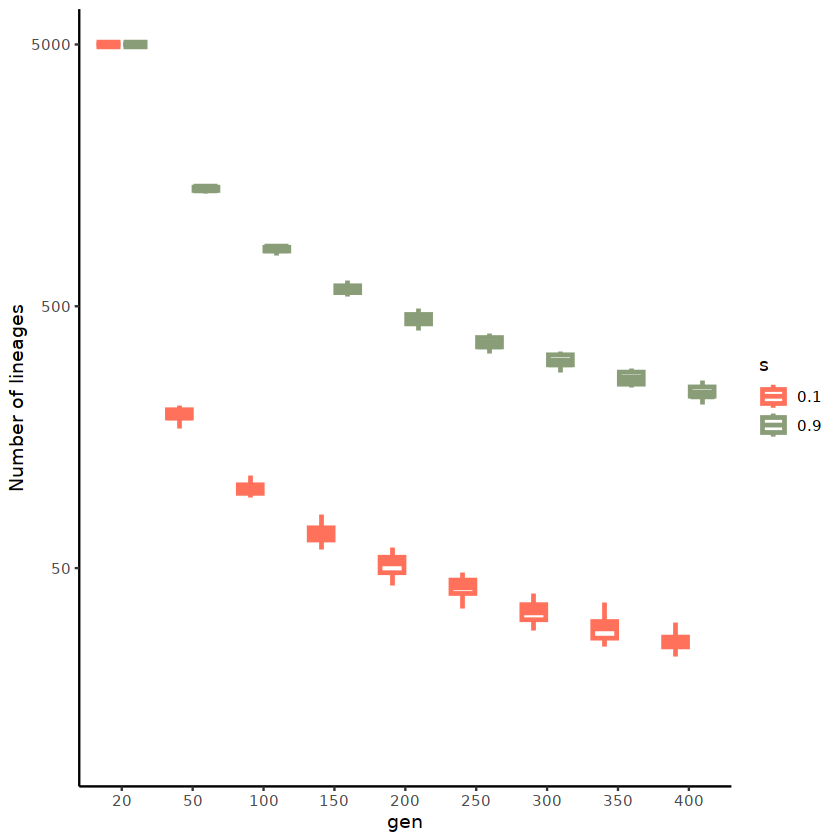

In [4]:
plot_df = data.frame(s = s_ls, gen = gen_ls, lineage_counts = lineage_ls, sim = sim_ls)
plot_df$s = factor(plot_df$s, levels = c(0.1, 0.9))
plot_df$gen = factor(plot_df$gen, levels = c(20, 50, 100, 150, 200, 250, 300, 350, 400))

p0 = ggplot(plot_df, aes( x = gen, y = lineage_counts, color = s)) + geom_boxplot(outlier.shape = NA, size = 1) + 
        theme_classic() + scale_y_log10(breaks = c(50, 500, 5000), limits = c(10, 5000)) + ylab("Number of lineages") + 
        scale_color_manual(values = c("#ff715b", "#899d78"))

p1 = ggplot(subset(plot_df, s==0.1) , aes( x = gen, y = lineage_counts)) + geom_boxplot(outlier.shape = NA, color = "#eb9d70")+theme_classic() + scale_y_log10(breaks = c(50, 500, 5000), limits = c(10, 5000)) + ylab("Number of lineages") 
p2 = ggplot(subset(plot_df, s==0.9) , aes( x = gen, y = lineage_counts)) + geom_boxplot(outlier.shape = NA, color = "#45688f")+theme_classic() + scale_y_log10(breaks = c(50, 500, 5000), limits = c(10, 5000)) + ylab("Number of lineages") 

p0
ggsave(p0, filename = "/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/combined_lineage_over_generation.pdf", height = 5, width = 3)

## Fig. 1f-g

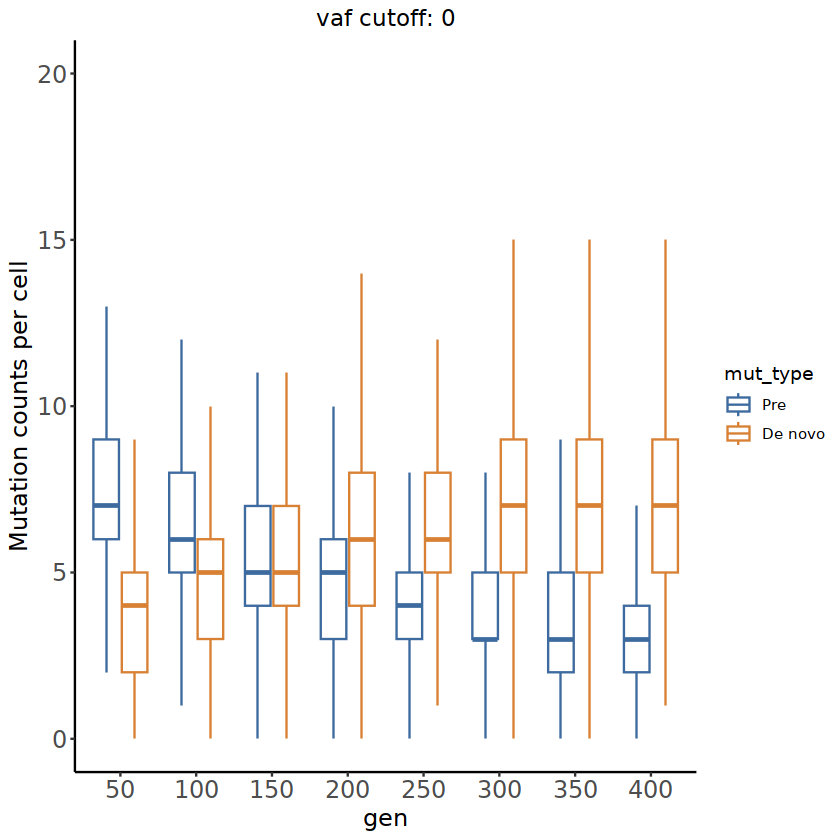

Warning message:
“Removed 83 rows containing non-finite values (`stat_boxplot()`).”


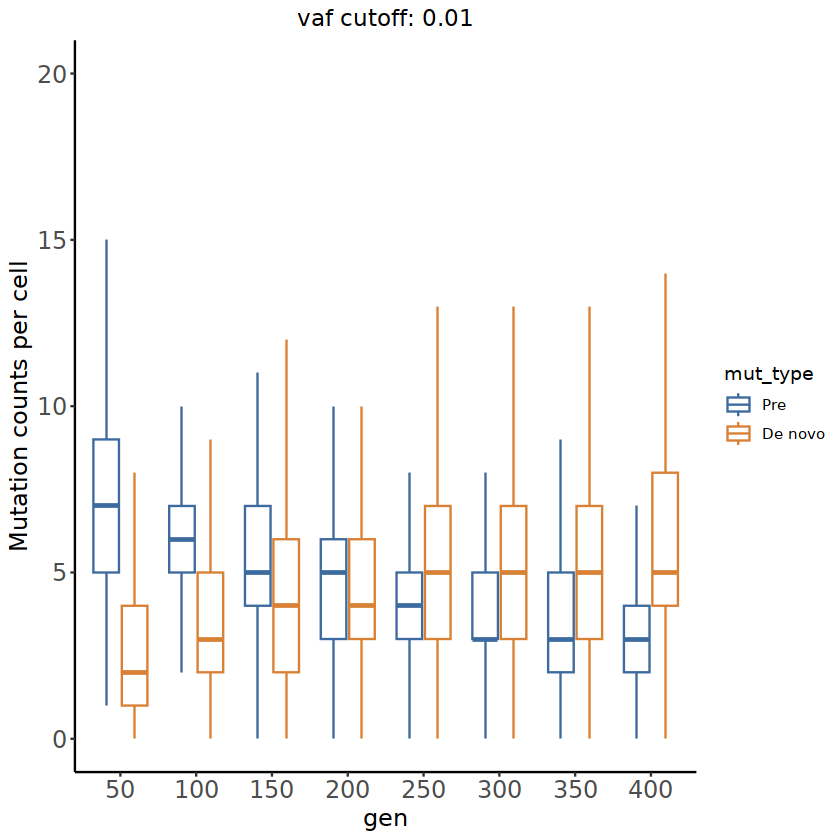

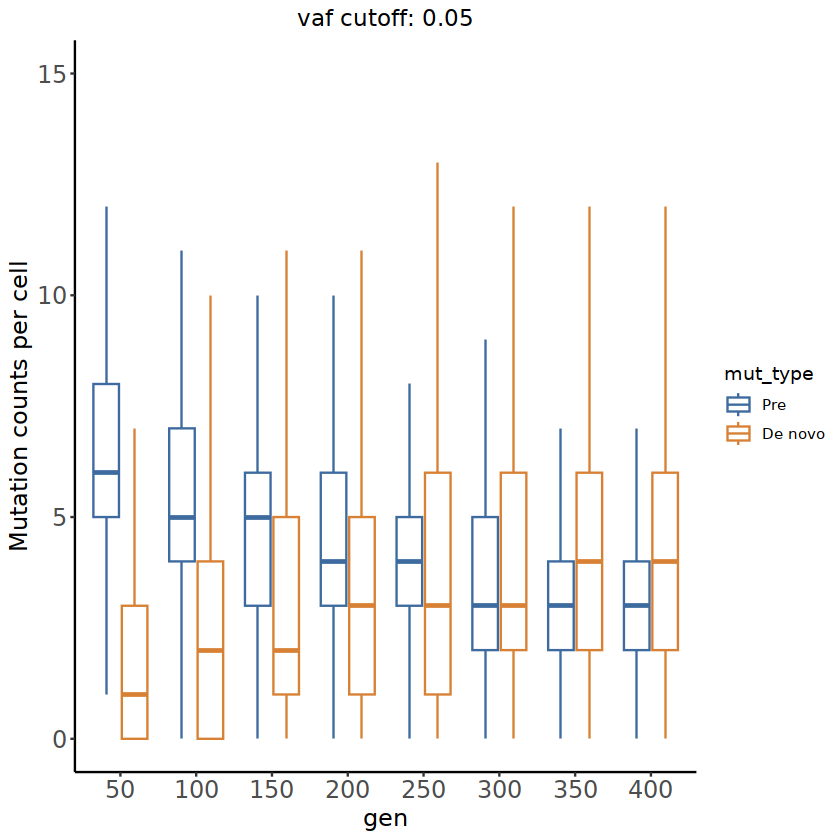

In [135]:
#Weak expansion
simul_id = 841652
col_pal = c("#3e6b9f", "#d88135")
in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0_expan_0.9.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p1 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0", y = "Mutation counts per cell") +
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal)

in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0.01_expan_0.9.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p2 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0.01", y = "Mutation counts per cell") +
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal)
#+ ylim(0,20)

in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0.05_expan_0.9.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p3 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0.05", y = "Mutation counts per cell")+
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal) + ylim(0,15)

p1
p2
p3




In [136]:
ggsave(filename = paste0("/syn1/wangxin/work/mtsim/0705/plots/Fig1C_preVSdn_over_generation_linear_bn_", simul_id, "cutoff_0.01_expan_0.9.pdf"), p2, height = 2, width = 3)
ggsave(filename = paste0("/syn1/wangxin/work/mtsim/0705/plots/Fig1C_preVSdn_over_generation_linear_bn_", simul_id, "cutoff_0.05_expan_0.9.pdf"), p3, height = 2, width = 3)

Warning message:
“Removed 83 rows containing non-finite values (`stat_boxplot()`).”


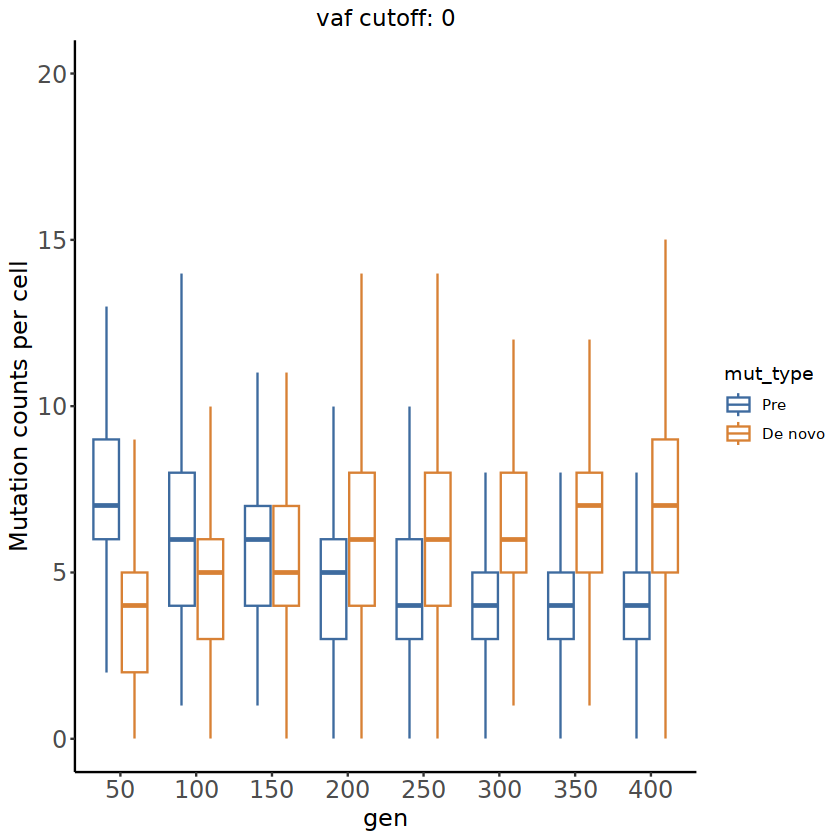

Warning message:
“Removed 234 rows containing non-finite values (`stat_boxplot()`).”


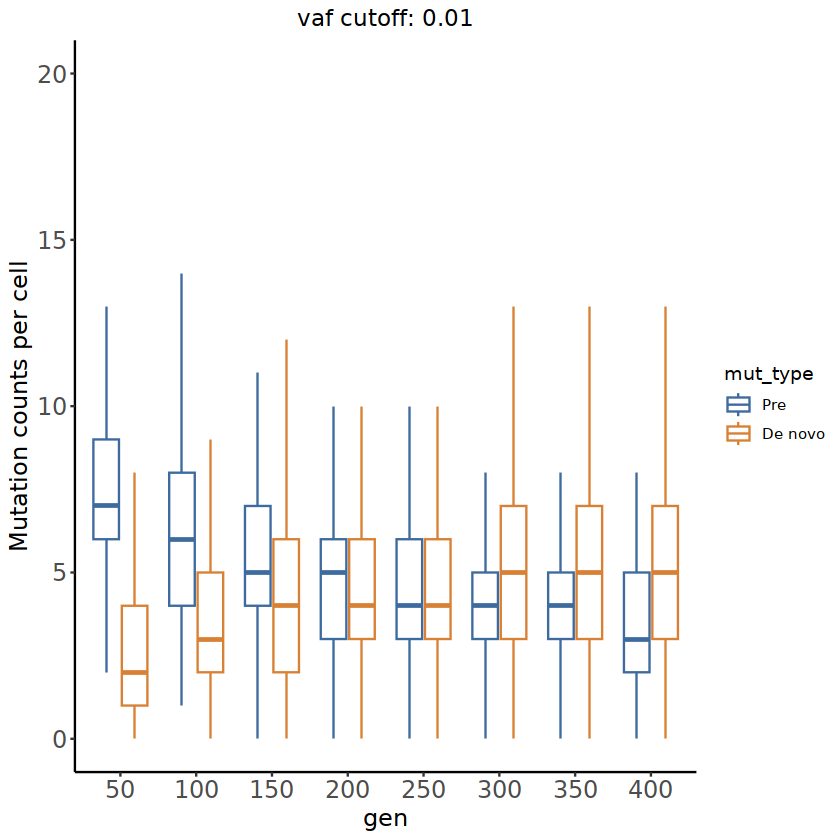

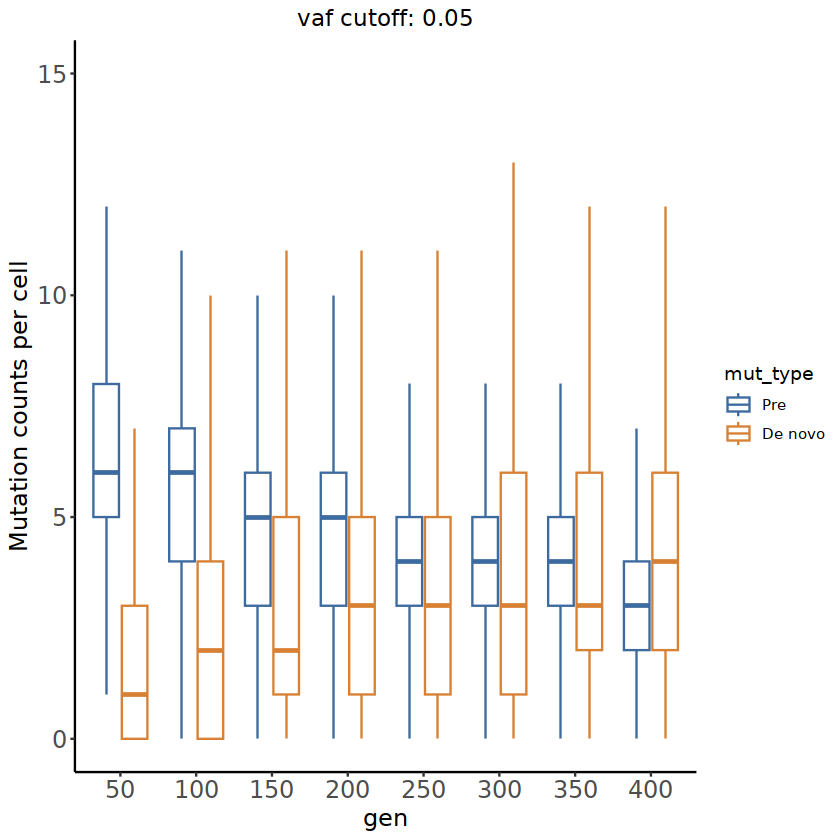

In [133]:
#strong expansion
simul_id = 841652
col_pal = c("#3e6b9f", "#d88135")
in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0_expan_0.1.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p1 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0", y = "Mutation counts per cell") +
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal)

in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0.01_expan_0.1.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p2 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0.01", y = "Mutation counts per cell") +
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal)
#+ ylim(0,20)

in_file = paste0("/syn1/wangxin/work/mtsim/0705/figdata/1c/preVSdenovo_mut_per_cell_", simul_id, "_co_0.05_expan_0.1.csv")
df = read.csv(in_file)
df$gen = factor(df$gen, levels = c(50, 100, 150, 200, 250, 300, 350, 400))
df$mut_type = factor(df$mut_type, levels = c("Pre", "De novo"))
p3 = ggplot(df, aes(x=gen, y=counts, color = mut_type)) + geom_boxplot(outlier.shape = NA) + theme_classic() + labs(title = "vaf cutoff: 0.05", y = "Mutation counts per cell")+
     theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 14), axis.title = element_text(size=14)) + scale_color_manual(values = col_pal) + ylim(0,15)

p1
p2
p3




In [134]:
ggsave(filename = paste0("/syn1/wangxin/work/mtsim/0705/plots/Fig1C_preVSdn_over_generation_linear_bn_", simul_id, "cutoff_0.01_expan_0.1.pdf"), p2, height = 2, width = 3)
ggsave(filename = paste0("/syn1/wangxin/work/mtsim/0705/plots/Fig1C_preVSdn_over_generation_linear_bn_", simul_id, "cutoff_0.05_expan_0.1.pdf"), p3, height = 2, width = 3)


Warning message:
“Removed 234 rows containing non-finite values (`stat_boxplot()`).”


# Fig. 2

## Fig. 2c

In [208]:
model_pal = c("#ff715b", "#899d78")
names(model_pal) = c("Strong", "Weak")

Strong      Weak 
"#ff715b" "#899d78"

In [201]:
cas_df = read.csv("/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/data/fig2/aggregation_score.csv")

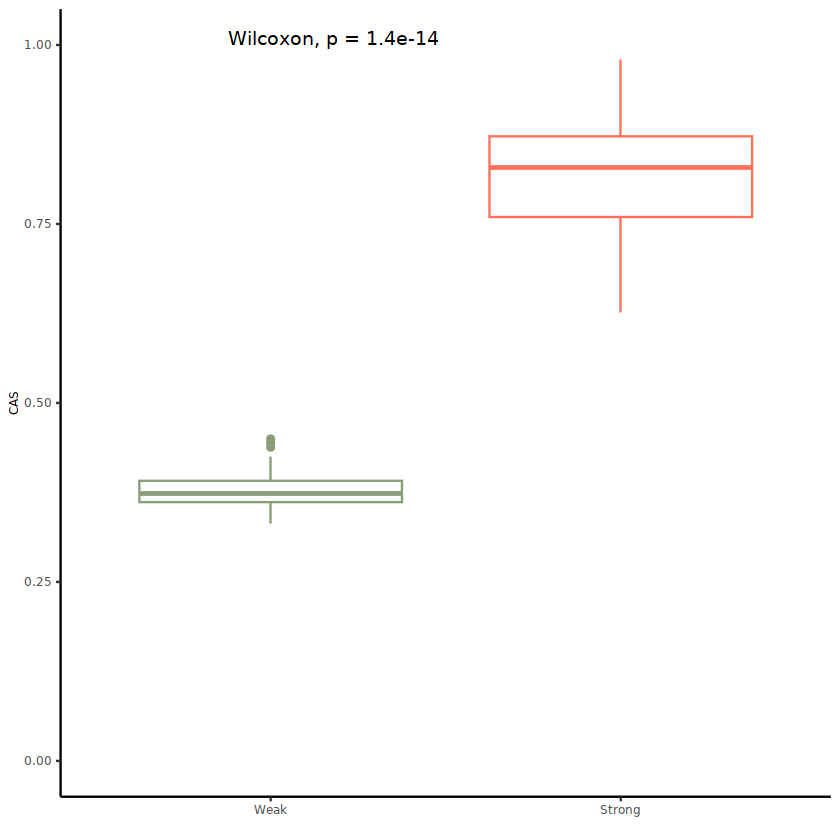

In [232]:
#weak expansion
plot_df = data.frame(pivot_longer(cas_df, cols = c("const_0.9","const_0.1", "mid_0.9", "mid_0.1"), names_to = "model", values_to = "CAS"))
sub_plot_df = subset(plot_df, subset = model %in%  c("const_0.9","const_0.1"))
sub_plot_df[sub_plot_df$model == "const_0.9", "model"] = "Weak"
sub_plot_df[sub_plot_df$model == "const_0.1", "model"] = "Strong"
sub_plot_df$model = factor(sub_plot_df$model, levels = c("Weak", "Strong"))
p1 = ggplot(sub_plot_df, aes(x=model, y=CAS, color=model)) + geom_boxplot() + scale_color_manual(values =  model_pal) + theme_classic() +
     theme(plot.title=element_text(hjust=0.5, size=7), axis.text = element_text(size = 7), axis.title = element_text(size=7)) +  xlab("") + 
    ylab("CAS") + ylim(0, 1) + theme(legend.position = "none") +stat_compare_means(method = "wilcox.test")
p1
ggsave(p1, file = "/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/fig2/constant_model_CAS_comparison.pdf", width = 2, height = 2.5)

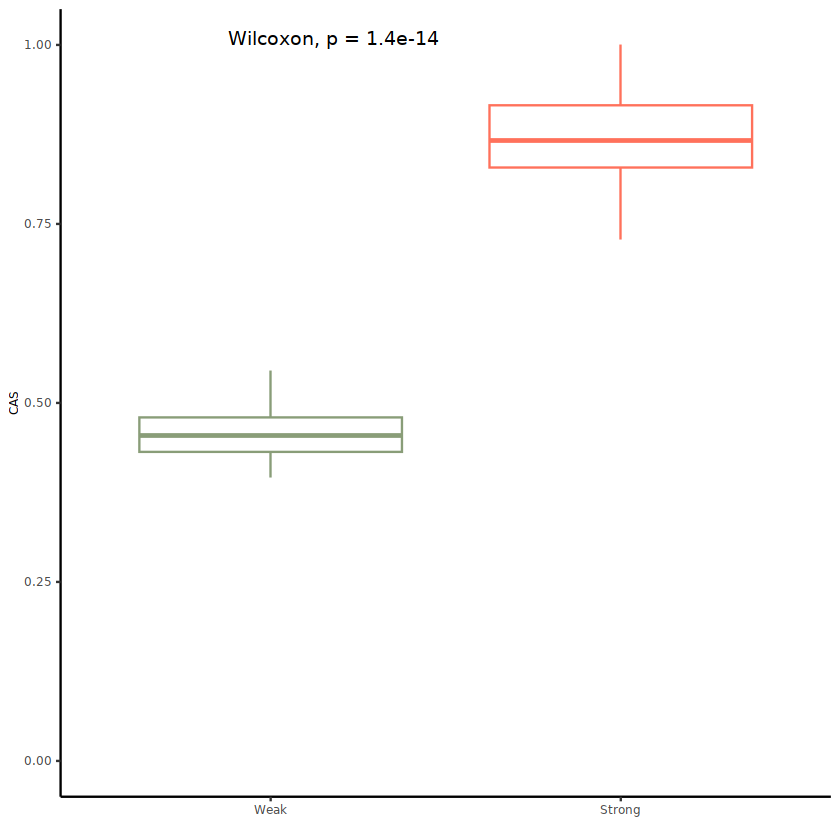

In [231]:
#strong expansion
sub_plot_df = subset(plot_df, subset = model %in%  c("mid_0.9","mid_0.1"))
sub_plot_df[sub_plot_df$model == "mid_0.9", "model"] = "Weak"
sub_plot_df[sub_plot_df$model == "mid_0.1", "model"] = "Strong"
sub_plot_df$model = factor(sub_plot_df$model, levels = c("Weak", "Strong"))
p2 = ggplot(sub_plot_df, aes(x=model, y=CAS, color=model)) + geom_boxplot() + scale_color_manual(values =  model_pal) + theme_classic() +
     theme(plot.title=element_text(hjust=0.5, size=7), axis.text = element_text(size = 7), axis.title = element_text(size=7)) +  xlab("") + 
    ylab("CAS") + ylim(0, 1) + theme(legend.position = "none") +stat_compare_means(method = "wilcox.test")
p2
ggsave(p2, file = "/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/fig2/bottleneck_model_CAS_comparison.pdf", width = 2, height = 2.5)

## Fig. 2d

In [22]:
col_pal = c("#3e6b9f", "#d88135")
lb = sapply(strsplit(list.dirs("/syn1/wangxin/work/GB_rev/simul/1209/res/linear_bn"), "/"), function(x) {tail(x,n=1)})[-1]
lc = sapply(strsplit(list.dirs("/syn1/wangxin/work/GB_rev/simul/1209/res/linear_const"), "/"), function(x) {tail(x,n=1)})[-1]

Saving 6.67 x 6.67 in image
File has been save to /syn1/wangxin/work/GB_rev/simul/1209/plots/CIV_pre_existing_proportion_Linear_bottleneck.pdf



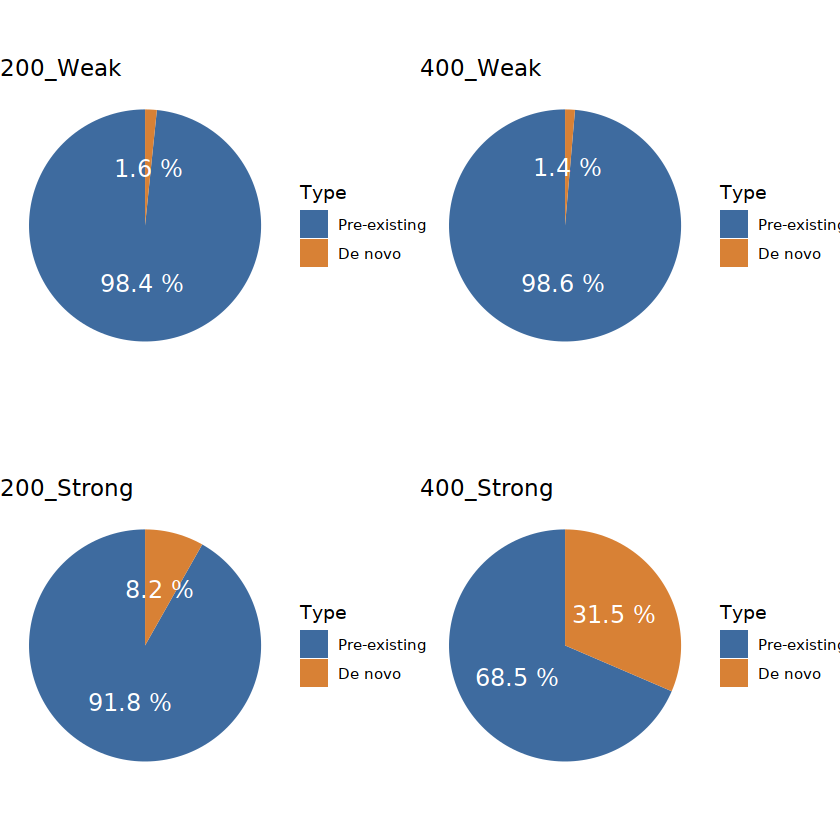

In [24]:
idx = 1 #bottleneck model
dif_mode = list(lb, lc)
bn_mode = c("linear_bn", "linear_const")
test_mode = dif_mode[[idx]]
title_ls = c("Linear_bottleneck", "Linear_const")
pie_title = title_ls[idx]
mode_ls = c("Weak expansion", "Strong expansion")
expansion_ls = c("0.9", "0.1")
plot_df = data.frame(matrix(ncol=2, nrow=0))
colnames(plot_df) =c("Percentage", "Model")
mean_per_ls = c()


for (x in 1:2){
    pre_per_ls_200 = c()
    pre_per_ls_400 = c()
    for (y in test_mode) {
        fn = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/mut_type_", bn_mode[idx], "_", y, "_500_5e-08_200gen_", expansion_ls[x], ".csv")
        if (file.exists(fn)) {
            df = read.csv(fn, header = T)
            pre_per = sum(df$Type == "pre-existing")/nrow(df)
            pre_per_ls_200 = append(pre_per_ls_200, pre_per)
        }
        
        fn = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/mut_type_", bn_mode[idx], "_", y, "_500_5e-08_400gen_", expansion_ls[x], ".csv")
        if (file.exists(fn)) {
            df = read.csv(fn, header = T)
            pre_per = sum(df$Type == "pre-existing")/nrow(df)
            pre_per_ls_400 = append(pre_per_ls_400, pre_per)
        }
        
   }
        mean_per_ls = append(mean_per_ls, c(mean(pre_per_ls_200), mean(pre_per_ls_400)))
}


title_ls = c("200_Weak", "400_Weak", "200_Strong", "400_Strong")
fig_list = list()
for (idx1 in 1:length(title_ls)) {
    pdf2 = data.frame("Percentage"= c(mean_per_ls[idx1], 1 - mean_per_ls[idx1]), "Type" = c("Pre-existing", "De novo"))
    pdf2$Type = factor(pdf2$Type, levels = c("Pre-existing", "De novo"))
    
    
    fig_list[[idx1]] = ggplot(pdf2, aes(x = "", y = Percentage, fill = Type)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) + 
      theme_void() + 
      scale_fill_manual(values = col_pal) +
      geom_text(aes(label = paste(round(Percentage * 100, 1), "%")), 
                position = position_stack(vjust = 0.5), 
                size = 5, color = "white") + labs(title = title_ls[idx1])

}

# Arrange plots on one page
combined_plots <- plot_grid(plotlist = fig_list, nrow = 2)  # Adjust nrow as needed
combined_plots
# Save to PDF
pdf_file_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/plots/CIV_pre_existing_proportion_", pie_title, ".pdf")
ggsave(filename = pdf_file_path, combined_plots)
message(paste0("File has been save to ", pdf_file_path))



Saving 6.67 x 6.67 in image
File has been save to /syn1/wangxin/work/GB_rev/simul/1209/plots/CIV_pre_existing_proportion_Linear_const.pdf



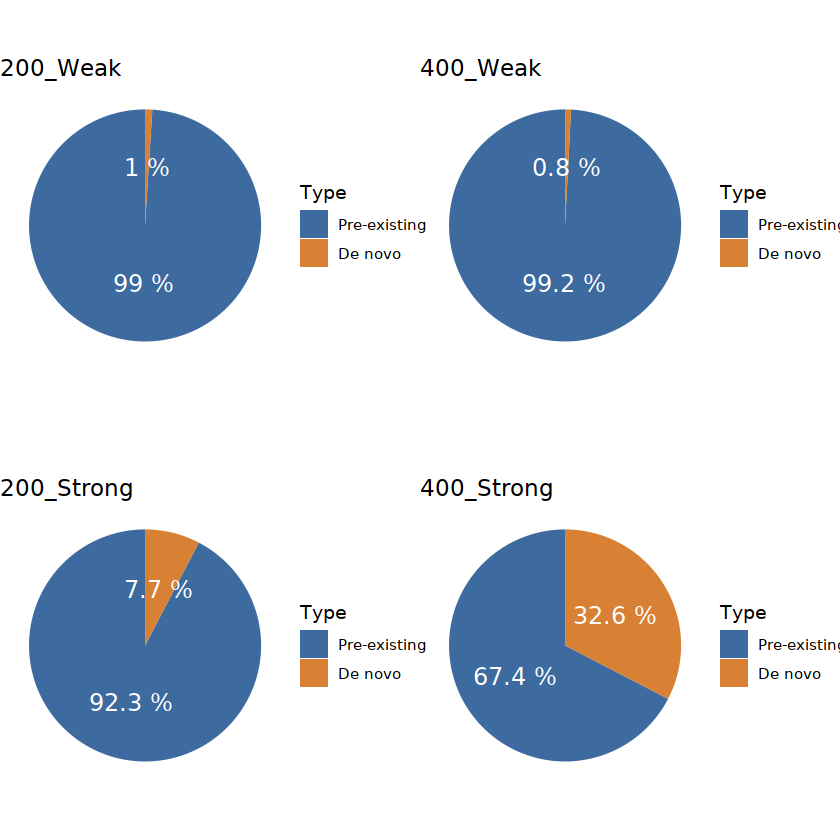

In [25]:
idx = 2 #constant model
dif_mode = list(lb, lc)
bn_mode = c("linear_bn", "linear_const")
test_mode = dif_mode[[idx]]
title_ls = c("Linear_bottleneck", "Linear_const")
pie_title = title_ls[idx]
mode_ls = c("Weak expansion", "Strong expansion")
expansion_ls = c("0.9", "0.1")
plot_df = data.frame(matrix(ncol=2, nrow=0))
colnames(plot_df) =c("Percentage", "Model")
mean_per_ls = c()


for (x in 1:2){
    pre_per_ls_200 = c()
    pre_per_ls_400 = c()
    for (y in test_mode) {
        fn = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/mut_type_", bn_mode[idx], "_", y, "_500_5e-08_200gen_", expansion_ls[x], ".csv")
        if (file.exists(fn)) {
            df = read.csv(fn, header = T)
            pre_per = sum(df$Type == "pre-existing")/nrow(df)
            pre_per_ls_200 = append(pre_per_ls_200, pre_per)
        }
        
        fn = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/mut_type_", bn_mode[idx], "_", y, "_500_5e-08_400gen_", expansion_ls[x], ".csv")
        if (file.exists(fn)) {
            df = read.csv(fn, header = T)
            pre_per = sum(df$Type == "pre-existing")/nrow(df)
            pre_per_ls_400 = append(pre_per_ls_400, pre_per)
        }
        
   }
        mean_per_ls = append(mean_per_ls, c(mean(pre_per_ls_200), mean(pre_per_ls_400)))
}


title_ls = c("200_Weak", "400_Weak", "200_Strong", "400_Strong")
fig_list = list()
for (idx1 in 1:length(title_ls)) {
    pdf2 = data.frame("Percentage"= c(mean_per_ls[idx1], 1 - mean_per_ls[idx1]), "Type" = c("Pre-existing", "De novo"))
    pdf2$Type = factor(pdf2$Type, levels = c("Pre-existing", "De novo"))
    
    
    fig_list[[idx1]] = ggplot(pdf2, aes(x = "", y = Percentage, fill = Type)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) + 
      theme_void() + 
      scale_fill_manual(values = col_pal) +
      geom_text(aes(label = paste(round(Percentage * 100, 1), "%")), 
                position = position_stack(vjust = 0.5), 
                size = 5, color = "white") + labs(title = title_ls[idx1])

}

# Arrange plots on one page
combined_plots <- plot_grid(plotlist = fig_list, nrow = 2)  # Adjust nrow as needed
combined_plots
# Save to PDF
pdf_file_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/plots/CIV_pre_existing_proportion_", pie_title, ".pdf")
ggsave(filename = pdf_file_path, combined_plots)
message(paste0("File has been save to ", pdf_file_path))



## Fig. 2f

In [44]:
exp_pal = c("#8a9d79", "#f5775f")
names(exp_pal) = c("Weak expansion", "Strong expansion")

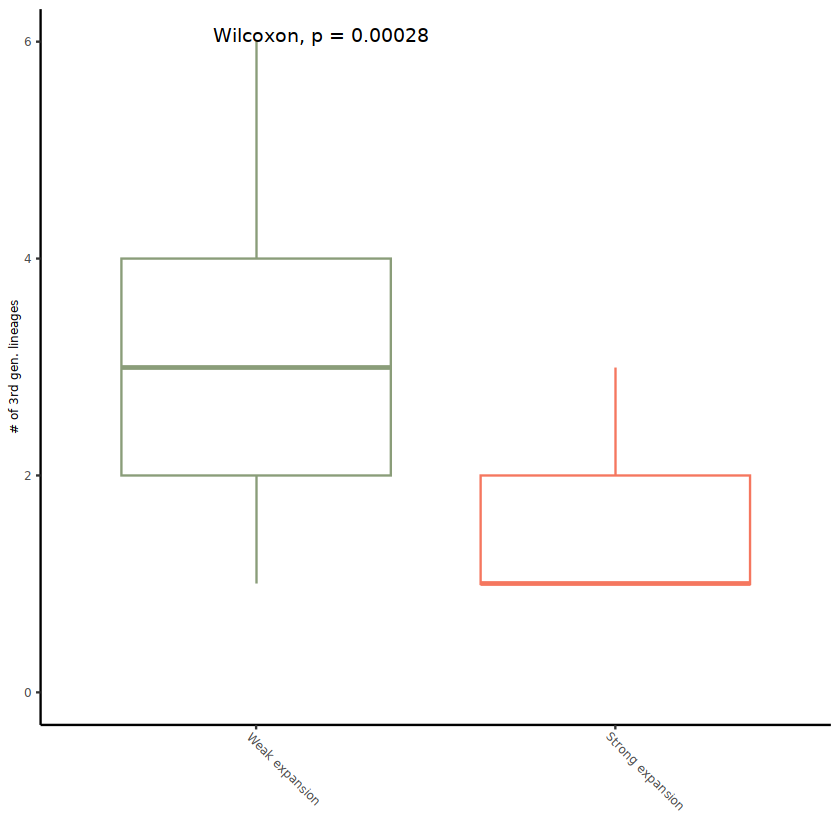

In [46]:
#bottleneck model
sim_id = "257859"
dif_mode = "linear_bn"
dif = "linear"

strong_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/CIV_composition_", dif_mode, "_", sim_id, "_500_5e-08_400gen_0.1_sub.csv")
weak_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/CIV_composition_", dif_mode, "_", sim_id, "_500_5e-08_400gen_0.9_sub.csv")
out_pdf_name = paste0("/syn1/wangxin/work/GB_rev/simul/1209/plots/lineage_composition_comparison_",dif_mode,".pdf")
compo_df = read.csv(weak_path, check.names = F)
weak_df = as.data.frame(table(compo_df$clone))


compo_df = read.csv(strong_path, check.names = F)
strong_df = as.data.frame(table(compo_df$clone))

lineage_anc_df = rbind(weak_df, strong_df)
lineage_anc_df$model = c(rep("Weak expansion", nrow(weak_df)),rep("Strong expansion", nrow(strong_df)))
lineage_anc_df$model = factor(lineage_anc_df$model, levels = c("Weak expansion", "Strong expansion"))

p1 = ggplot(lineage_anc_df, aes(x=model, y = Freq, color = model)) + geom_boxplot(outlier.shape = NA) + theme_classic() + theme(legend.position = "none") +
        theme(plot.title=element_text(hjust=0.5, size=7), axis.text = element_text(size = 7), axis.title = element_text(size=7),
        axis.text.x = element_text(angle = 315, hjust = 0.1, vjust = 0.5)) + scale_color_manual(values= exp_pal) + xlab("") + 
    ylab("# of 3rd gen. lineages") + theme (legend.position = "none") + stat_compare_means() + ylim(0, 6)
p1

ggsave(p1, filename = out_pdf_name, height = 4, width =3)

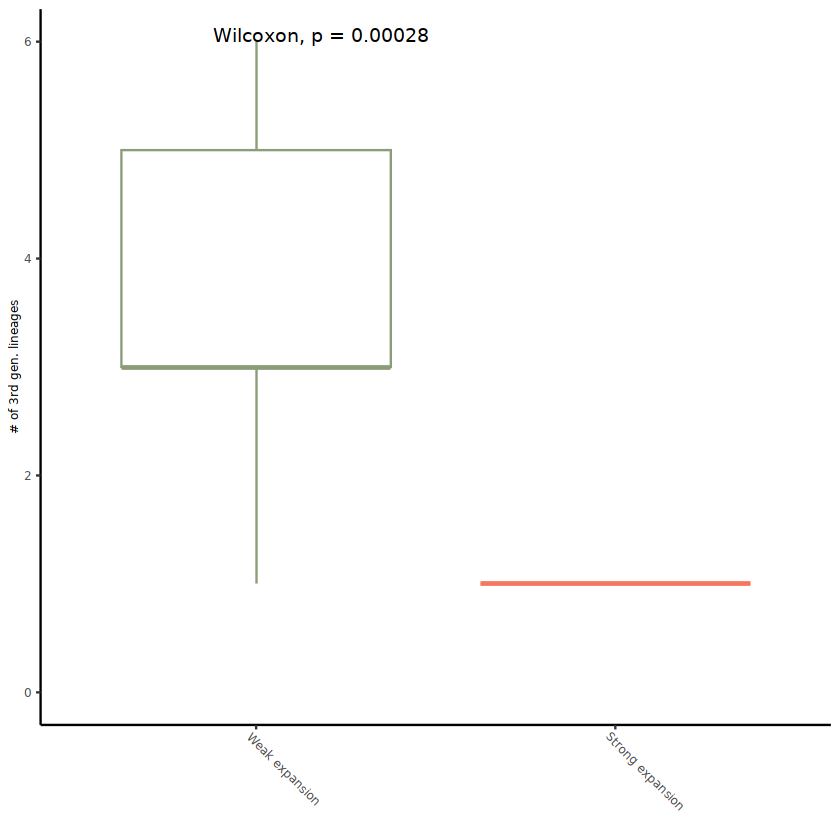

In [49]:
#constant model
sim_id = "233938"
dif_mode = "linear_const"

strong_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/CIV_composition_", dif_mode, "_", sim_id, "_500_5e-08_400gen_0.1_sub.csv")
weak_path = paste0("/syn1/wangxin/work/GB_rev/simul/1209/CIV/CIV_composition_", dif_mode, "_", sim_id, "_500_5e-08_400gen_0.9_sub.csv")
out_pdf_name = paste0("/syn1/wangxin/work/GB_rev/simul/1209/plots/lineage_composition_comparison_",dif_mode,".pdf")
compo_df = read.csv(weak_path, check.names = F)
weak_df = as.data.frame(table(compo_df$clone))


compo_df = read.csv(strong_path, check.names = F)
strong_df = as.data.frame(table(compo_df$clone))

lineage_anc_df = rbind(weak_df, strong_df)
lineage_anc_df$model = c(rep("Weak expansion", nrow(weak_df)),rep("Strong expansion", nrow(strong_df)))
lineage_anc_df$model = factor(lineage_anc_df$model, levels = c("Weak expansion", "Strong expansion"))

p1 = ggplot(lineage_anc_df, aes(x=model, y = Freq, color = model)) + geom_boxplot(outlier.shape = NA) + theme_classic() + theme(legend.position = "none") +
        theme(plot.title=element_text(hjust=0.5, size=7), axis.text = element_text(size = 7), axis.title = element_text(size=7),
        axis.text.x = element_text(angle = 315, hjust = 0.1, vjust = 0.5)) + scale_color_manual(values= exp_pal) + xlab("") + 
    ylab("# of 3rd gen. lineages") + theme (legend.position = "none") + stat_compare_means() + ylim(0, 6)
p1

ggsave(p1, filename = out_pdf_name, height = 4, width =3)

# Fig. 3

## Fig. 3c, f

In [194]:
simul_weak = read.csv("/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/data/fig3/se_weak.csv")
simul_strong = read.csv("/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/data/fig3/se_strong.csv")


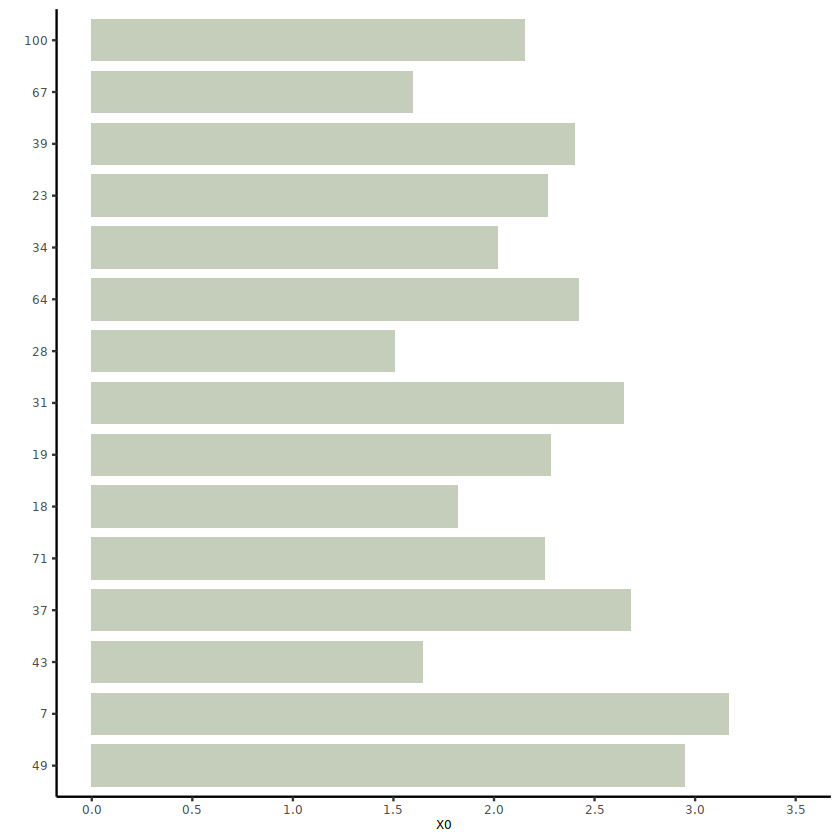

In [199]:
#weak expansion
simul_weak$X = factor(simul_weak$X, levels = rev(simul_weak$X) )
diversity_plot = ggplot(simul_weak, aes(x=X, y=X0)) + geom_bar(stat="identity", fill = "#899d78", alpha=0.5, width = 0.8) + theme_classic() +
        theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 7), axis.title = element_text(size=7)) + xlab("") + 
        scale_y_continuous(breaks = seq(0, 3.5, 0.5), limits = c(0,3.5)) + coord_flip()
diversity_plot
ggsave(plot = diversity_plot, file = paste0("/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/Fig3_simul_weak_exp_diversity_plot.pdf"), height = 2.5, width = 2.5)

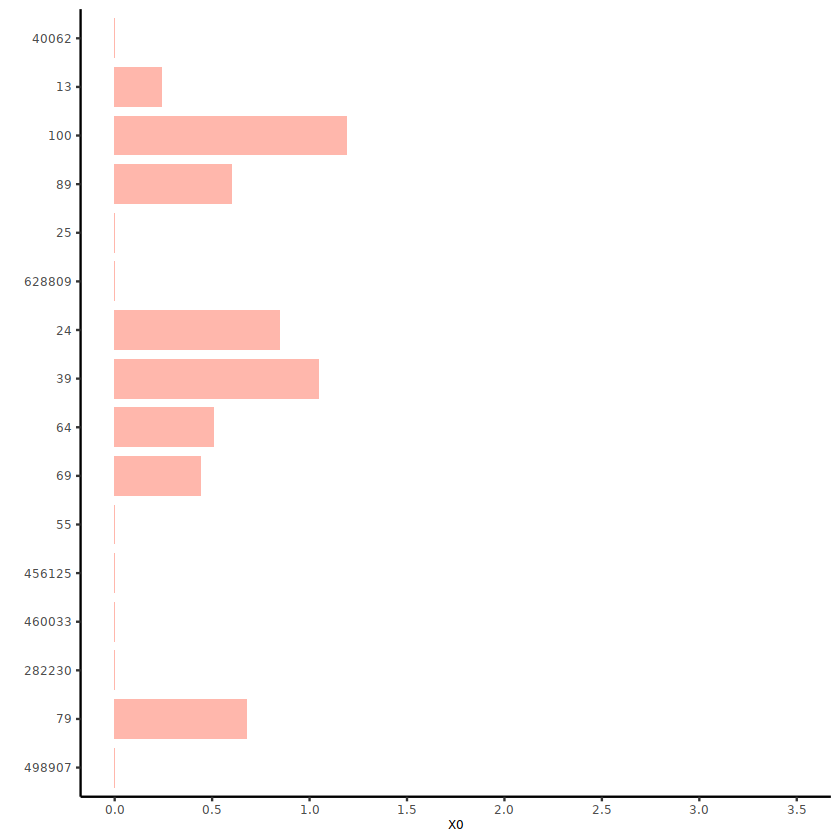

In [200]:
#strong expansion
simul_strong$X = factor(simul_strong$X, levels = rev(simul_strong$X) )
diversity_plot = ggplot(simul_strong, aes(x=X, y=X0)) + geom_bar(stat="identity", fill = "#ff715b", alpha=0.5, width = 0.8) + theme_classic() +
        theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 7), axis.title = element_text(size=7)) + xlab("") + 
  scale_y_continuous(breaks = seq(0, 3.5, 0.5), limits = c(0,3.5)) + coord_flip()
diversity_plot
ggsave(plot = diversity_plot, file = paste0("/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/Fig3_simul_strong_exp_diversity_plot.pdf"), height = 2.5, width = 2.5)